# Testing Enviornment

In [1]:
import pandas as pd
import numpy as np

## Running tests

The following section unit-tests most of the code written for the proof of concept prototype.

In [ ]:
%run ../test/test_algorithms.py

In [ ]:
%run ../test/test_dataloader.py

In [ ]:
%run ../test/test_predictorsI.py

In [ ]:
%run ../test/test_predictorsII.py

## Running example of the system

In [ ]:
%run ../tools/algorithms.py

In [ ]:
%run ../tools/dataloader.py

In [ ]:
test = DataLoader('aapl', '2009-01-01', '2010-02-10')

In [ ]:
prices = test.get_close()

In [ ]:
prices

In [ ]:
#prices = np.array(prices)
#len(prices)

In [ ]:
prices

In [ ]:
%run ../tools/predictorsI.py

In [ ]:
op0 = BasicUnivariatePredictor(prices, 25, 7)
op1 = BasicUnivariatePredictor(prices, 25, 7)
op2 = BasicUnivariatePredictor(prices, 25, 7)
op3 = BasicUnivariatePredictor(prices, 25, 7)

In [ ]:
op0.create_bilstm()

In [ ]:
op0.model_blueprint()

In [ ]:
op0.fit_model(10)

In [ ]:
op0.show_performance()

In [ ]:
oyea = prices[-26:-1]
#oyea = X[-1]
#oyea

In [ ]:
nice = op0.predict(oyea)
nice

In [ ]:
op1.create_lstm()

In [ ]:
op1.model_blueprint()

In [ ]:
op1.fit_model(10)

In [ ]:
op1.show_performance()

In [ ]:
nice = op1.predict(oyea)
nice

In [ ]:
op2.create_cnn()

In [ ]:
op2.model_blueprint()

In [ ]:
op2.fit_model(10)

In [ ]:
op2.show_performance()

In [ ]:
nice = op2.predict(oyea)
nice

In [ ]:
op3.create_mlp()

In [ ]:
op3.model_blueprint()

In [ ]:
op3.fit_model(100)

In [ ]:
op3.show_performance()

In [ ]:
oyea = prices[-26:-1]
#oyea = X[-1]
#oyea

In [ ]:
nice = op3.predict(oyea)
nice

In [ ]:
%run ../tools/predictorsII.py

In [ ]:
oo = UnivariatePredictorII(prices, 7)

In [ ]:
oo.fit_neural_model(100,"D")

In [ ]:
oo.show_performance_neural()

In [ ]:
oo.predict_neural()

In [ ]:
oo.fit_prophet_model()

In [ ]:
oo.show_performance_prophet()

In [ ]:
oo.predict_prophet()

In [ ]:
%run ../tools/predictorsIII.py

In [ ]:
len(prices)

In [ ]:
op4 = HybridUnivariatePredictor(prices,2, 24, 7)

In [ ]:
op4.create_cnnlstm()

In [ ]:
op4.model_blueprint()

In [ ]:
op4.fit_model(10)

In [ ]:
op4.show_performance()

In [ ]:
oyea = prices[-25:-1]
#oyea = X[-1]
#oyea

In [ ]:
nice = op4.predict(oyea)
nice
#noice = pd.DataFrame(nice, columns=['yea'])
#noice = nice.reshape(20, 1)
#noice = pd.DataFrame(noice, columns=['yea'])

In [ ]:
nice.plot()

## First whole system test - I am alive

In [2]:
%run ../tools/algorithms.py
%run ../tools/dataloader.py
%run ../tools/predictorsI.py
%run ../tools/predictorsII.py
%run ../tools/predictorsIII.py

In [3]:
training = DataLoader('aapl', '2010-01-01', '2010-05-01')

In [4]:
training = training.get_close()

In [5]:
predict = DataLoader('aapl', '2010-06-01', '2010-08-01')

In [6]:
predict = predict.get_close()

In [7]:
def data_prep(df, input_batch_size, future_horizon):
    input_b = df[0:input_batch_size]
    real_value = df[input_batch_size:input_batch_size + future_horizon]
    
    return input_b, real_value

In [8]:
# future_horizon = length -> days into the future predicted
def individual_predictors(training_df, input_batch, future_horizon):
    one = HybridUnivariatePredictor(training_df,2, len(input_batch), future_horizon)
    one.create_cnnlstm()
    one.fit_model(10)
    one.show_performance()
    
    two = BasicUnivariatePredictor(training_df, len(input_batch), future_horizon)
    two.create_bilstm()
    two.fit_model(10)
    two.show_performance()
    
    
    three = BasicUnivariatePredictor(training_df, len(input_batch), future_horizon)
    three.create_cnn()
    three.fit_model(10)
    three.show_performance()
    
    prediction_one = one.predict(input_batch)
    prediction_two = two.predict(input_batch)
    prediction_three = three.predict(input_batch)
    
    return prediction_one, prediction_two, prediction_three

In [9]:
predict_req, real = data_prep(predict, 24, 15)

Epoch 1/10
4/4 [==============================] - 1s 184ms/step - loss: 62.3999 - mean_squared_error: 62.3999 - val_loss: 78.2539 - val_mean_squared_error: 78.2539
Epoch 2/10
4/4 [==============================] - 0s 8ms/step - loss: 61.5568 - mean_squared_error: 61.5568 - val_loss: 76.3816 - val_mean_squared_error: 76.3816
Epoch 3/10
4/4 [==============================] - 0s 8ms/step - loss: 59.4895 - mean_squared_error: 59.4895 - val_loss: 70.4787 - val_mean_squared_error: 70.4787
Epoch 4/10
4/4 [==============================] - 0s 9ms/step - loss: 52.9951 - mean_squared_error: 52.9951 - val_loss: 55.7219 - val_mean_squared_error: 55.7219
Epoch 5/10
4/4 [==============================] - 0s 8ms/step - loss: 42.2637 - mean_squared_error: 42.2637 - val_loss: 51.4560 - val_mean_squared_error: 51.4560
Epoch 6/10
4/4 [==============================] - 0s 7ms/step - loss: 39.1452 - mean_squared_error: 39.1452 - val_loss: 44.4932 - val_mean_squared_error: 44.4932
Epoch 7/10
4/4 [==========

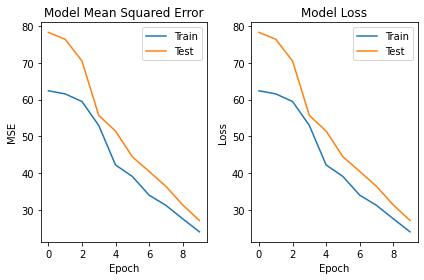

Epoch 1/10
4/4 [==============================] - 1s 128ms/step - loss: 61.3772 - mean_squared_error: 61.3772 - val_loss: 67.6179 - val_mean_squared_error: 67.6179
Epoch 2/10
4/4 [==============================] - 0s 23ms/step - loss: 51.3719 - mean_squared_error: 51.3719 - val_loss: 56.7202 - val_mean_squared_error: 56.7202
Epoch 3/10
4/4 [==============================] - 0s 18ms/step - loss: 40.6723 - mean_squared_error: 40.6723 - val_loss: 42.2364 - val_mean_squared_error: 42.2364
Epoch 4/10
4/4 [==============================] - 0s 17ms/step - loss: 30.4727 - mean_squared_error: 30.4727 - val_loss: 29.9204 - val_mean_squared_error: 29.9204
Epoch 5/10
4/4 [==============================] - 0s 18ms/step - loss: 23.7050 - mean_squared_error: 23.7050 - val_loss: 33.9855 - val_mean_squared_error: 33.9855
Epoch 6/10
4/4 [==============================] - 0s 17ms/step - loss: 18.8929 - mean_squared_error: 18.8929 - val_loss: 19.1125 - val_mean_squared_error: 19.1125
Epoch 7/10
4/4 [=====

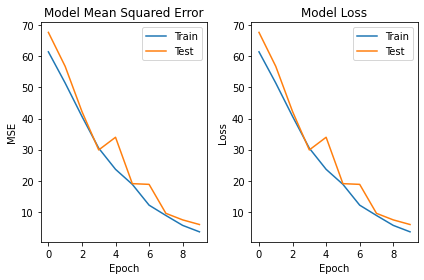

Epoch 1/10
4/4 [==============================] - 0s 32ms/step - loss: 62.0310 - mean_squared_error: 62.0310 - val_loss: 69.9712 - val_mean_squared_error: 69.9712
Epoch 2/10
4/4 [==============================] - 0s 5ms/step - loss: 52.0408 - mean_squared_error: 52.0408 - val_loss: 57.3608 - val_mean_squared_error: 57.3608
Epoch 3/10
4/4 [==============================] - 0s 8ms/step - loss: 41.2626 - mean_squared_error: 41.2626 - val_loss: 42.2569 - val_mean_squared_error: 42.2569
Epoch 4/10
4/4 [==============================] - 0s 6ms/step - loss: 28.3513 - mean_squared_error: 28.3513 - val_loss: 24.1693 - val_mean_squared_error: 24.1693
Epoch 5/10
4/4 [==============================] - 0s 6ms/step - loss: 14.3604 - mean_squared_error: 14.3604 - val_loss: 9.7517 - val_mean_squared_error: 9.7517
Epoch 6/10
4/4 [==============================] - 0s 6ms/step - loss: 6.3922 - mean_squared_error: 6.3922 - val_loss: 6.3879 - val_mean_squared_error: 6.3879
Epoch 7/10
4/4 [=================

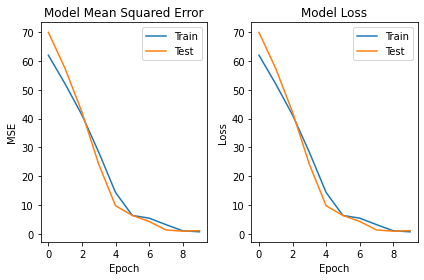

In [25]:
A, B, C = individual_predictors(training, predict_req, 15)

In [26]:
predict_req

,Close
Date,
2010-06-01,9.315357
2010-06-02,9.426786
2010-06-03,9.397143
2010-06-04,9.141429
2010-06-07,8.962143
2010-06-08,8.904643
2010-06-09,8.685714
2010-06-10,8.946786
2010-06-11,9.053929


In [27]:
real

,Close
Date,
2010-07-06,8.879643
2010-07-07,9.238214
2010-07-08,9.217500
2010-07-09,9.272143
2010-07-12,9.188929
2010-07-13,8.992857
2010-07-14,9.026071
2010-07-15,8.980357
2010-07-16,8.925000


In [28]:
final_df = pd.concat([A, B, C], axis=1)


In [29]:
final_df

,CNN-LSTM,Bidirectional LSTM,CNN
0,0.867940,8.799788,8.736588
1,13.591872,23.692699,8.893050
2,16.769112,1.385190,10.431115
3,7.059855,8.594333,8.686644
4,3.937551,3.675891,9.182476
5,-0.906948,0.341380,10.476237
6,6.220505,-2.480238,8.848942
7,7.014133,6.857179,9.056499
8,4.174687,11.873022,9.030947
9,1.342502,6.486610,8.656052


### System Disagreement

In [30]:
def system_disagreement(df):
    disagreement(df).plot()
    predictor_score(df).plot()

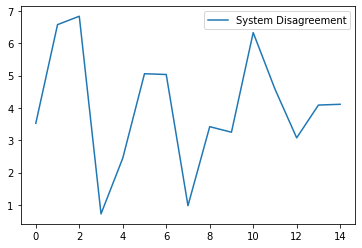

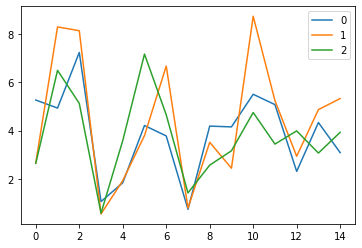

In [31]:
system_disagreement(final_df)

In [32]:
disagreement(final_df)

,System Disagreement
0,3.525266
1,6.577622
2,6.837298
3,0.723017
4,2.447371
5,5.059193
6,5.035191
7,0.977475
8,3.421482
9,3.250467


In [33]:
predictor_score(final_df)

,0,1,2
0,5.266832,2.665016,2.643950
1,4.933216,8.300159,6.499490
2,7.240639,8.143282,5.127974
3,1.053755,0.542263,0.573033
4,1.835528,1.922748,3.583836
5,4.210504,3.794395,7.172681
6,3.776393,6.676641,4.652539
7,0.733107,0.785425,1.413895
8,4.184865,3.513470,2.566112
9,4.152553,2.437850,3.160997


### System consensus

In [34]:
def consensus(df, real):
    consensus = pd.DataFrame()
    
    average = average_consolidation(final_df)
    nomemory = consolidated_predictions(final_df, real)
    memory = consolidated_predictions_memory(final_df, real)
    focus = consolidated_predictions_focused(final_df, real)
    anchor = consolidated_predictions_anchor(final_df, real, 1.5)
    
    consensus['Average'] = average
    consensus['NoMemory'] = nomemory
    consensus['Memory'] = memory
    consensus['Focus'] = focus
    consensus['Anchor'] = anchor
    
    return consensus

In [62]:
algos = consensus(final_df, real)

In [63]:
performance = real.copy()

In [69]:
algos

,Average,NoMemory,Memory,Focus,Anchor
0,6.134772,6.134772,6.134772,6.134772,6.407594
1,15.392541,16.284714,15.838627,23.692699,17.932019
2,9.528472,11.770177,9.112149,10.431115,9.818995
3,8.113611,8.218956,8.249575,8.686644,7.978947
4,5.598640,6.012918,6.155255,9.182476,6.581893
5,3.303557,5.085923,4.592489,10.476237,5.567325
6,4.196403,4.965647,4.738910,8.848942,5.252697
7,7.642603,8.006676,7.902204,9.056499,8.320939
8,8.359552,8.445680,8.543031,9.030947,9.014835
9,5.495055,6.550110,6.175642,8.656052,5.979808


In [65]:
real_value = real.copy()
real_value

,Close
Date,
2010-07-06,8.879643
2010-07-07,9.238214
2010-07-08,9.217500
2010-07-09,9.272143
2010-07-12,9.188929
2010-07-13,8.992857
2010-07-14,9.026071
2010-07-15,8.980357
2010-07-16,8.925000


In [67]:
def evaluation(algorithms, real_df):
    algorithms = algorithms.set_index(real_df.index)
    algorithms['Real Value'] = real_df
    return algorithms

In [68]:
evaluation(algos, real_value)

,Average,NoMemory,Memory,Focus,Anchor,Real Value
Date,,,,,,
2010-07-06,6.134772,6.134772,6.134772,6.134772,6.407594,8.879643
2010-07-07,15.392541,16.284714,15.838627,23.692699,17.932019,9.238214
2010-07-08,9.528472,11.770177,9.112149,10.431115,9.818995,9.217500
2010-07-09,8.113611,8.218956,8.249575,8.686644,7.978947,9.272143
2010-07-12,5.598640,6.012918,6.155255,9.182476,6.581893,9.188929
2010-07-13,3.303557,5.085923,4.592489,10.476237,5.567325,8.992857
2010-07-14,4.196403,4.965647,4.738910,8.848942,5.252697,9.026071
2010-07-15,7.642603,8.006676,7.902204,9.056499,8.320939,8.980357
2010-07-16,8.359552,8.445680,8.543031,9.030947,9.014835,8.925000


In [38]:
average = pd.DataFrame(algos['Average'])
average = average.set_index(performance.index)
performance['Average'] = average

<AxesSubplot:xlabel='Date'>

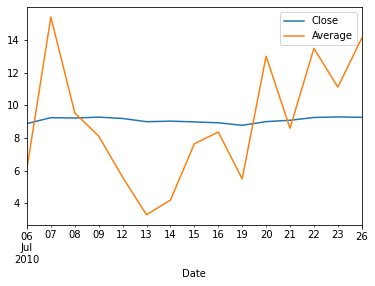

In [39]:
performance.plot()

In [40]:
performance2 = real.copy()

In [41]:
nomemory = pd.DataFrame(algos['NoMemory'])
nomemory = nomemory.set_index(performance.index)
performance2['No Memory'] = nomemory

<AxesSubplot:xlabel='Date'>

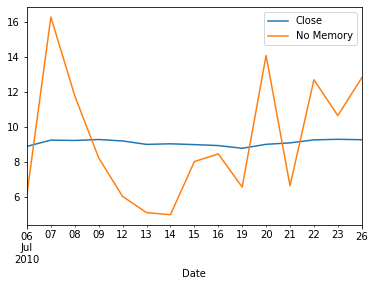

In [42]:
performance2.plot()

In [43]:
performance3 = real.copy()

In [44]:
memory = pd.DataFrame(algos['Average'])
memory = memory.set_index(performance.index)
performance3['Average'] = memory

<AxesSubplot:xlabel='Date'>

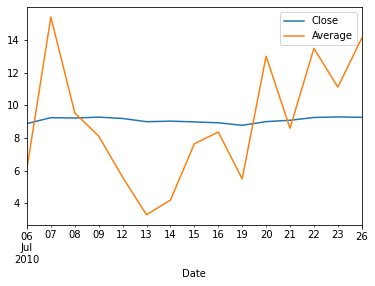

In [45]:
performance3.plot()

In [46]:
performance4 = real.copy()

In [47]:
focus = pd.DataFrame(algos['Focus'])
focus = focus.set_index(performance.index)
performance4['Focus'] = focus

<AxesSubplot:xlabel='Date'>

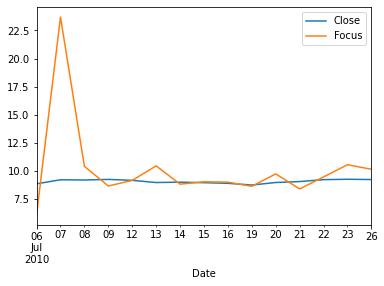

In [48]:
performance4.plot()

In [49]:
performance5 = real.copy()

In [50]:
anchor = pd.DataFrame(algos['Anchor'])
anchor = anchor.set_index(performance.index)
performance5['Anchor'] = anchor

<AxesSubplot:xlabel='Date'>

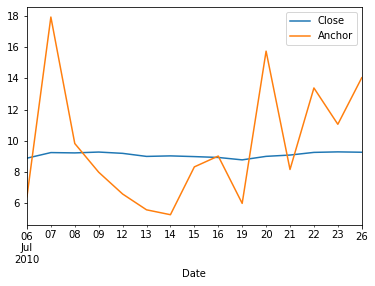

In [51]:
performance5.plot()